In [2]:
import numpy as np
import pandas as pd
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%pip install dask
%pip install seaborn
%pip install jinja2


You should consider upgrading via the '/Users/aman/Work/demand_prediction/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/aman/Work/demand_prediction/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/aman/Work/demand_prediction/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


To install Graphviz on macOS, run the following in a terminal:

```bash
brew install graphviz
```

If you're in a notebook environment and want to install the Python package, run:

```bash
pip install graphviz
```

In [4]:
# paths for the three dfs

df_jan_path = "../data/raw/yellow_tripdata_2016-01.csv"
df_feb_path = "../data/raw/yellow_tripdata_2016-02.csv"
df_mar_path = "../data/raw/yellow_tripdata_2016-03.csv"

# load the dataframes

df_jan = dd.read_csv(df_jan_path, assume_missing=True)
df_feb = dd.read_csv(df_feb_path, assume_missing=True)
df_mar = dd.read_csv(df_mar_path, assume_missing=True)

In [5]:
df_feb.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       2.0  2016-02-25 17:24:20   2016-02-25 17:27:20              2.0   
1       2.0  2016-02-25 23:10:50   2016-02-25 23:31:50              2.0   
2       2.0  2016-02-01 00:00:01   2016-02-01 00:10:52              6.0   
3       1.0  2016-02-01 00:00:04   2016-02-01 00:05:16              1.0   
4       2.0  2016-02-01 00:00:05   2016-02-01 00:20:59              1.0   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           0.70        -73.947250        40.763771         1.0   
1           5.52        -73.983017        40.750992         1.0   
2           1.99        -73.992340        40.758202         1.0   
3           1.50        -73.981453        40.749722         1.0   
4           5.60        -74.000603        40.729755         1.0   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -73.992012         40.735390           2.0   
1                  N         -73.988586         40.758839           2.0   
2                  N         -73.964355         40.757977           1.0   
3                  N         -73.982323         40.763985           2.0   
4                  N         -73.951324         40.669834           1.0   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0          5.0    0.0      0.5         0.0           0.0   
1         20.0    0.5      0.5         0.0           0.0   
2          9.5    0.5      0.5         0.7           0.0   
3          6.5    0.5      0.5         0.0           0.0   
4         20.0    0.5      0.5         4.0           0.0   

   improvement_surcharge  total_amount  
0                    0.3           5.8  
1                    0.3          21.3  
2                    0.3          11.5  
3                    0.3           7.8  
4                    0.3          25.3

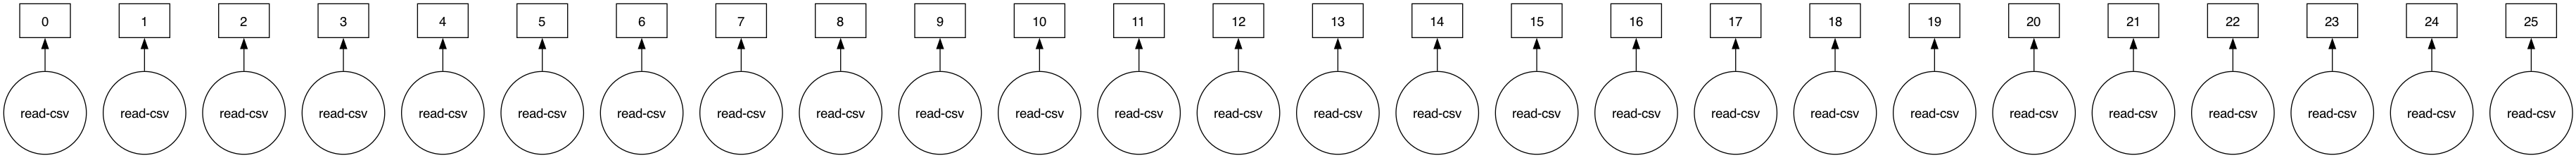

In [6]:
df_jan.visualize()

In [7]:
# shape of all the three datasets

print("Shape of january dataset", df_jan.shape)
print("Shape of february dataset", df_feb.shape)
print("Shape of march dataset", df_mar.shape)

Shape of january dataset (Delayed('int-6fb57205-6f6d-4123-9345-d9dbac755112'), 19)
Shape of february dataset (Delayed('int-fb18932d-b1da-4f28-9641-a4c445af398e'), 19)
Shape of march dataset (Delayed('int-04851f04-f4f7-4834-9e37-05db3ec4377f'), 19)


In [8]:
# concat the three dataframes as one

df_final = dd.concat([df_jan, df_feb, df_mar], axis=0).drop(columns=['extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'payment_type'])

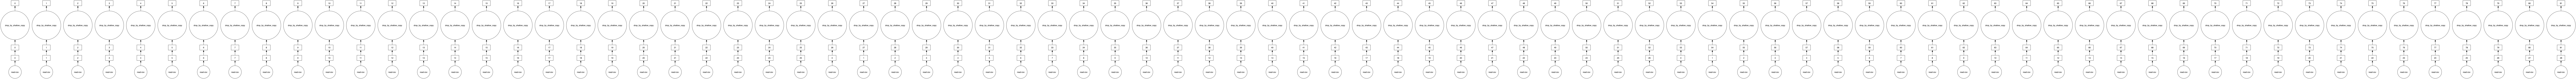

In [9]:
df_final.visualize()

In [10]:
df_final.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount'],
      dtype='object')

In [11]:
df_final.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       2.0  2016-01-01 00:00:00   2016-01-01 00:00:00              2.0   
1       2.0  2016-01-01 00:00:00   2016-01-01 00:00:00              5.0   
2       2.0  2016-01-01 00:00:00   2016-01-01 00:00:00              1.0   
3       2.0  2016-01-01 00:00:00   2016-01-01 00:00:00              1.0   
4       2.0  2016-01-01 00:00:00   2016-01-01 00:00:00              3.0   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           1.10        -73.990372        40.734695         1.0   
1           4.90        -73.980782        40.729912         1.0   
2          10.54        -73.984550        40.679565         1.0   
3           4.75        -73.993469        40.718990         1.0   
4           1.76        -73.960625        40.781330         1.0   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  fare_amount  
0                  N         -73.981842         40.732407          7.5  
1                  N         -73.944473         40.716679         18.0  
2                  N         -73.950272         40.788925         33.0  
3                  N         -73.962242         40.657333         16.5  
4                  N         -73.977264         40.758514          8.0

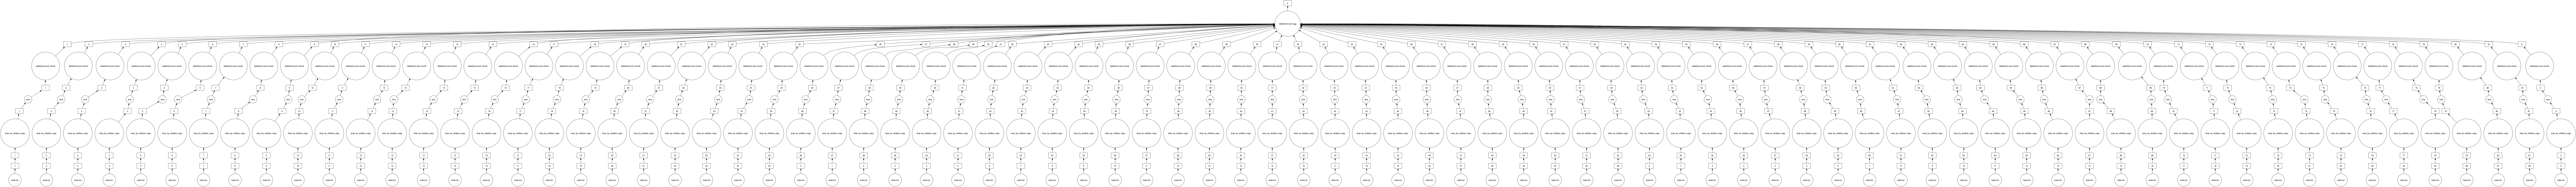

In [12]:
df_final.isna().sum().visualize()

In [13]:
df_final.isna().sum().compute()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
fare_amount              0
dtype: int64

In [14]:
df_final.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID               float64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
fare_amount              float64
dtype: object

# Analysis

In [15]:
sns.set_style("whitegrid")

In [16]:
# Stastical Summary of Numerical column

df_final.describe().compute()

VendorID  passenger_count  trip_distance  pickup_longitude  \
count  3.449986e+07     3.449986e+07   3.449986e+07      3.449986e+07   
mean   1.532576e+00     1.661700e+00   5.309408e+00     -7.283942e+01   
std    4.989377e-01     1.316154e+00   4.672575e+03      9.090656e+00   
min    1.000000e+00     0.000000e+00  -3.390584e+06     -1.616987e+02   
25%    1.000000e+00     1.000000e+00   1.100000e+00     -7.399055e+01   
50%    2.000000e+00     1.000000e+00   1.930000e+00     -7.397922e+01   
75%    2.000000e+00     2.000000e+00   3.800000e+00     -7.396252e+01   
max    2.000000e+00     9.000000e+00   1.907263e+07      9.464387e+01   

       pickup_latitude    RatecodeID  dropoff_longitude  dropoff_latitude  \
count     3.449986e+07  3.449986e+07       3.449986e+07      3.449986e+07   
mean      4.012605e+01  1.039150e+00      -7.290482e+01      4.016297e+01   
std       5.007832e+00  5.564537e-01       8.828348e+00      4.863875e+00   
min      -7.703949e+01  1.000000e+00      -1.616987e+02     -7.703949e+01   
25%       4.074137e+01  1.000000e+00      -7.399009e+01      4.074001e+01   
50%       4.075640e+01  1.000000e+00      -7.397832e+01      4.075612e+01   
75%       4.076979e+01  1.000000e+00      -7.395599e+01      4.077166e+01   
max       6.685682e+01  9.900000e+01       3.889659e+01      4.053167e+02   

        fare_amount  
count  3.449986e+07  
mean   1.257198e+01  
std    9.179006e+01  
min   -9.576000e+02  
25%    7.000000e+00  
50%    1.000000e+01  
75%    1.550000e+01  
max    4.294967e+05

# Vector ID

In [17]:
df_final['VendorID'].value_counts(normalize =True).visualize()

In [18]:
df_final['VendorID'].value_counts(normalize =True).compute()

VendorID
2.0    0.532576
1.0    0.467424
Name: proportion, dtype: float64

In [19]:
# pie chart of vendor share in NYC

vendor_share = (
    df_final["VendorID"]
    .value_counts(normalize=True)
    .compute()
)

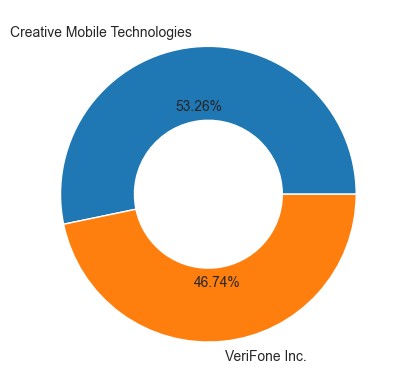

In [20]:
# donut chart

plt.pie(vendor_share, labels=["Creative Mobile Technologies","VeriFone Inc."], autopct="%.2f%%",
       radius=1, wedgeprops=dict(width=0.5, edgecolor="w"))
plt.show()

## Passenger Count

In [21]:
df_final["passenger_count"].value_counts().visualize()

In [22]:
passenger_count = df_final["passenger_count"].value_counts().compute()

<Axes: xlabel='passenger_count'>

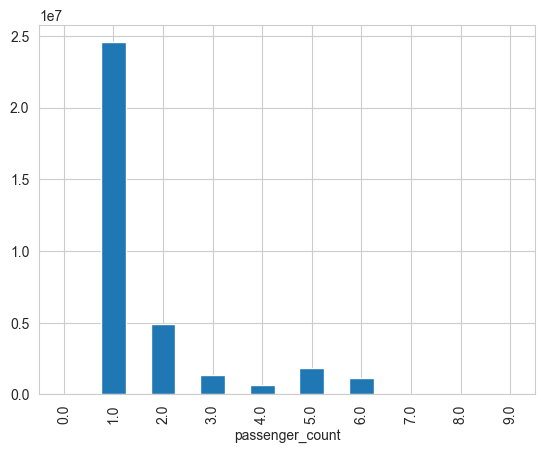

In [23]:
passenger_count.sort_index().plot(kind='bar')

Passenger count value above 5 are erroneous and shall be checked with local guidelines

## Trip Distance


<Axes: ylabel='trip_distance'>

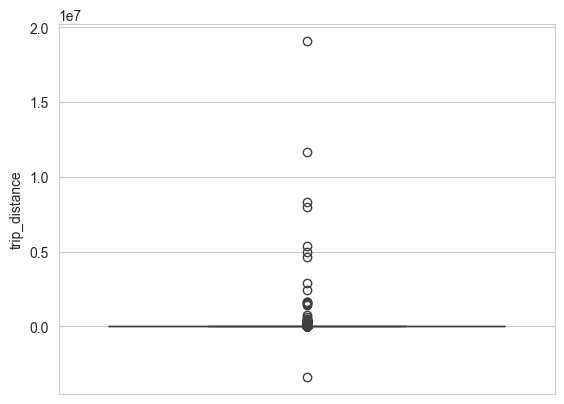

In [24]:
sns.boxplot(df_final['trip_distance'].compute())

In [25]:
df_final['trip_distance']

Dask Series Structure:
npartitions=82
    float64
        ...
     ...   
        ...
        ...
Name: trip_distance, dtype: float64
Dask Name: getitem, 6 graph layers

In [26]:
percentile_value = np.arange(0.1,1,0.1)
percentile_value

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [27]:
for percentile in percentile_value:
    print(f"The Trip distance value for {int(percentile * 100)}th percentile is {df_final['trip_distance'].quantile(q=percentile).compute()} ")

The Trip distance value for 10th percentile is 0.7 
The Trip distance value for 20th percentile is 0.97 
The Trip distance value for 30th percentile is 1.23 
The Trip distance value for 40th percentile is 1.56 
The Trip distance value for 50th percentile is 1.93 
The Trip distance value for 60th percentile is 2.49 
The Trip distance value for 70th percentile is 3.27 
The Trip distance value for 80th percentile is 4.6 
The Trip distance value for 90th percentile is 8.3 


In [28]:
percentile_value = np.arange(0.9,1,0.01)
percentile_value

array([0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [29]:
for percentile in percentile_value:
    print(f"The Trip distance value for {int(percentile * 100)}th percentile is {df_final['trip_distance'].quantile(q=percentile).compute()} ")

The Trip distance value for 90th percentile is 8.3 
The Trip distance value for 91th percentile is 8.91 
The Trip distance value for 92th percentile is 9.53 
The Trip distance value for 93th percentile is 10.2 
The Trip distance value for 94th percentile is 10.95 
The Trip distance value for 95th percentile is 12.1 
The Trip distance value for 96th percentile is 14.680000000000582 
The Trip distance value for 97th percentile is 16.91 
The Trip distance value for 98th percentile is 17.95 
The Trip distance value for 99th percentile is 19.375500000000464 


## Fare Amount

<Axes: ylabel='fare_amount'>

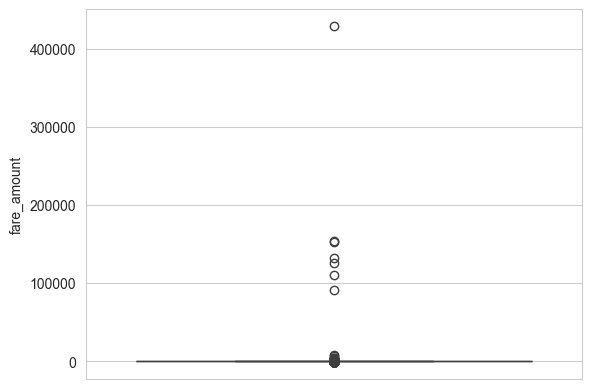

In [30]:
sns.boxplot(df_final.loc[:,"fare_amount"].compute())

In [31]:
# percentile plot
percentile_value = np.arange(0,1.10,.10)
percentile_value

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [32]:
for percentile in percentile_value:
    print(f"The fare Amount value for {int(percentile*100)}th percentile is {df_final['fare_amount'].quantile(q=percentile).compute()}")

The fare Amount value for 0th percentile is -957.6
The fare Amount value for 10th percentile is 5.0
The fare Amount value for 20th percentile is 6.0
The fare Amount value for 30th percentile is 7.5
The fare Amount value for 40th percentile is 8.5
The fare Amount value for 50th percentile is 10.0
The fare Amount value for 60th percentile is 11.5
The fare Amount value for 70th percentile is 14.0
The fare Amount value for 80th percentile is 18.0
The fare Amount value for 90th percentile is 27.0
The fare Amount value for 100th percentile is 429496.72


In [33]:
# percentile value
percentile_value = np.arange(.9,1,.01)

for percentile in percentile_value:
    print(f"The fare amount  Value at {int(percentile*100)}th value is {df_final['fare_amount'].quantile(q=percentile).compute()}")

The fare amount  Value at 90th value is 27.0
The fare amount  Value at 91th value is 29.0
The fare amount  Value at 92th value is 30.5
The fare amount  Value at 93th value is 33.0
The fare amount  Value at 94th value is 35.5
The fare amount  Value at 95th value is 40.0
The fare amount  Value at 96th value is 49.5
The fare amount  Value at 97th value is 52.0
The fare amount  Value at 98th value is 52.0
The fare amount  Value at 99th value is 52.0


## RateCodeID

In [34]:
rate_code_ids = (
    df_final['RatecodeID']
    .value_counts()
    .compute()
    )

In [35]:
rate_code_ids.sort_index()

RatecodeID
1.0     33627000
2.0       697595
3.0        56169
4.0        14459
5.0       103481
6.0          320
99.0         835
Name: count, dtype: int64

In [36]:
rate_code_ids.sort_index().index.tolist()

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 99.0]

<Axes: xlabel='RatecodeID'>

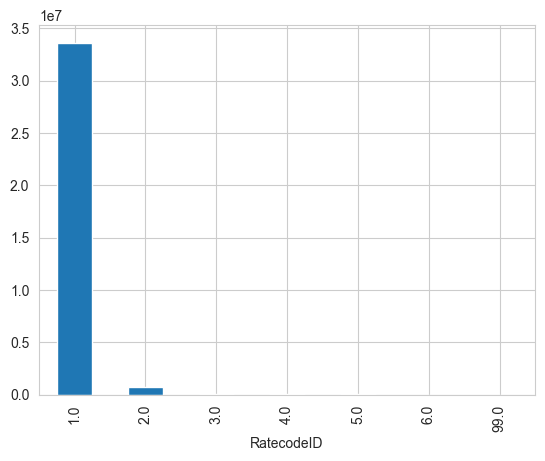

In [37]:
rate_code_ids.sort_index().plot(kind='bar')

missing value is replaced by 99

# Location Based Column

In [38]:
# make a subset of location based columns

location_subset = df_final[['pickup_latitude','pickup_longitude', 
                           'dropoff_latitude','dropoff_longitude']]

location_subset

Dask DataFrame Structure:
               pickup_latitude pickup_longitude dropoff_latitude dropoff_longitude
npartitions=82                                                                    
                       float64          float64          float64           float64
                           ...              ...              ...               ...
...                        ...              ...              ...               ...
                           ...              ...              ...               ...
                           ...              ...              ...               ...
Dask Name: getitem, 6 graph layers

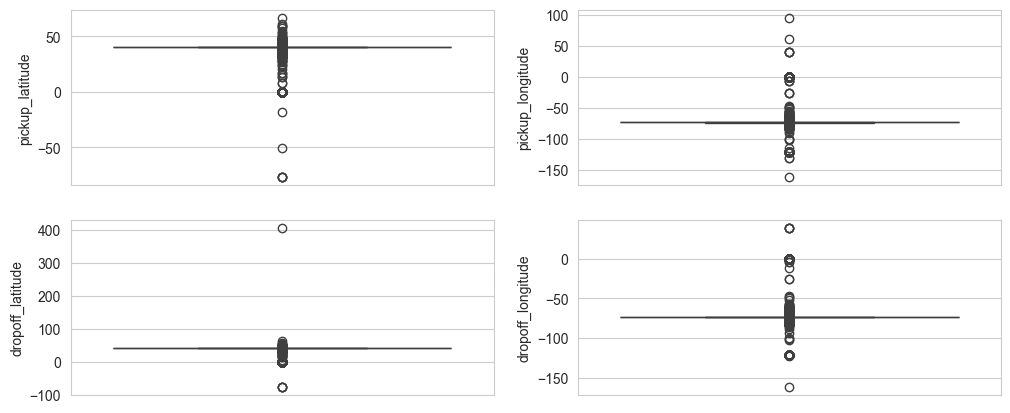

In [39]:
# boxplots for location based columns

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, figsize=(12,5))
for i in range(4):
    if i <= 1:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i].compute(),ax=ax1[i])
    else:
        # plot the boxplot
        sns.boxplot(y=location_subset.iloc[:,i].compute(),ax=ax2[i - 2])

<Axes: xlabel='count', ylabel='store_and_fwd_flag'>

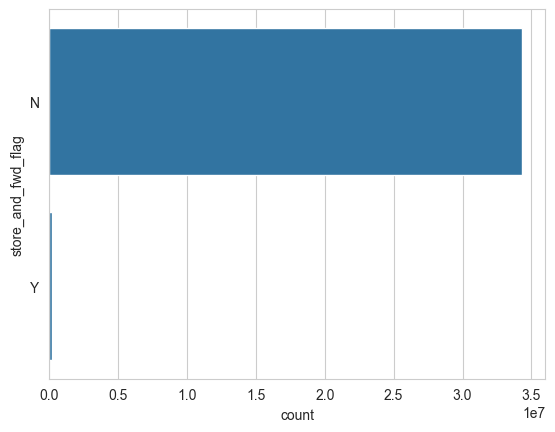

In [40]:
## Store and Fwd Flag
# count plot

sns.countplot(df_final["store_and_fwd_flag"].compute())

# DateAndTime Column

In [41]:
df_final.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount'],
      dtype='object')

In [42]:
# convert the columns to datetime

df_final["tpep_pickup_datetime"] = dd.to_datetime(df_final["tpep_pickup_datetime"], yearfirst=True, format="mixed")
df_final["tpep_dropoff_datetime"] = dd.to_datetime(df_final["tpep_dropoff_datetime"], yearfirst=True, format="mixed")

In [44]:
# create new columns

df_final["pickup_months"] = df_final["tpep_pickup_datetime"].dt.month
df_final["pickup_day_of_week"] = df_final["tpep_pickup_datetime"].dt.dayofweek
df_final["pickup_hour"] = df_final["tpep_pickup_datetime"].dt.hour

In [50]:
df_final.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'pickup_months',
       'pickup_day_of_week', 'pickup_hour'],
      dtype='object')

In [51]:
# plot the number of pickups

pickups_every_3_days = (
                            df_final
                            .set_index('tpep_pickup_datetime')
                            .resample("3D")
                            .size()
                            .compute()
)

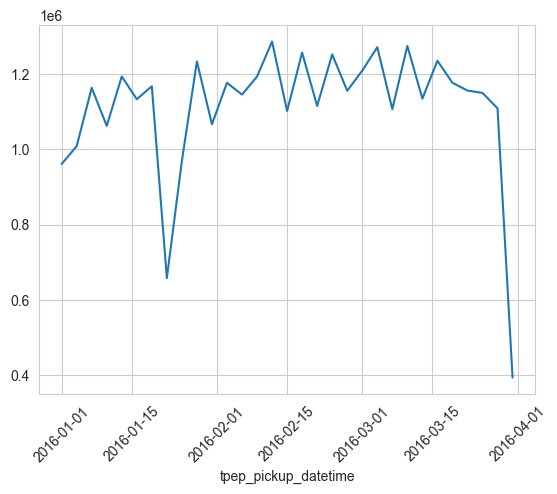

In [57]:
# plot the graph of pickups

sns.lineplot(pickups_every_3_days)
plt.xticks(rotation=45)
plt.show()

In [58]:
# pickups for each hour of the day

pickups_each_hour = (
    df_final
    .groupby(["pickup_hour","pickup_day_of_week"])["VendorID"]
    .count()
    .compute()
)

In [62]:
pickups_each_hour

pickup_hour  pickup_day_of_week
0            0                     100903
             4                     204112
             5                     280811
1            4                     142370
             5                     235408
                                    ...  
21           3                     338365
22           2                     289131
             3                     318720
23           2                     220946
             3                     271267
Name: VendorID, Length: 168, dtype: int64

In [63]:
pickups_each_hour = pickups_each_hour.reset_index()

In [64]:
pickups_each_hour

pickup_hour  pickup_day_of_week  VendorID
0              0                   0    100903
1              0                   4    204112
2              0                   5    280811
3              1                   4    142370
4              1                   5    235408
..           ...                 ...       ...
163           21                   3    338365
164           22                   2    289131
165           22                   3    318720
166           23                   2    220946
167           23                   3    271267

[168 rows x 3 columns]

In [69]:
pickups_each_hour.rename(columns={"VendorID":"Number of Pickups"},inplace=True)

In [70]:
day_names = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

replacement_mapper = {k:v for k,v in enumerate(day_names)}

replacement_mapper

{0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

In [71]:
pickups_each_hour.replace({"pickup_day_of_week":replacement_mapper},inplace=True)

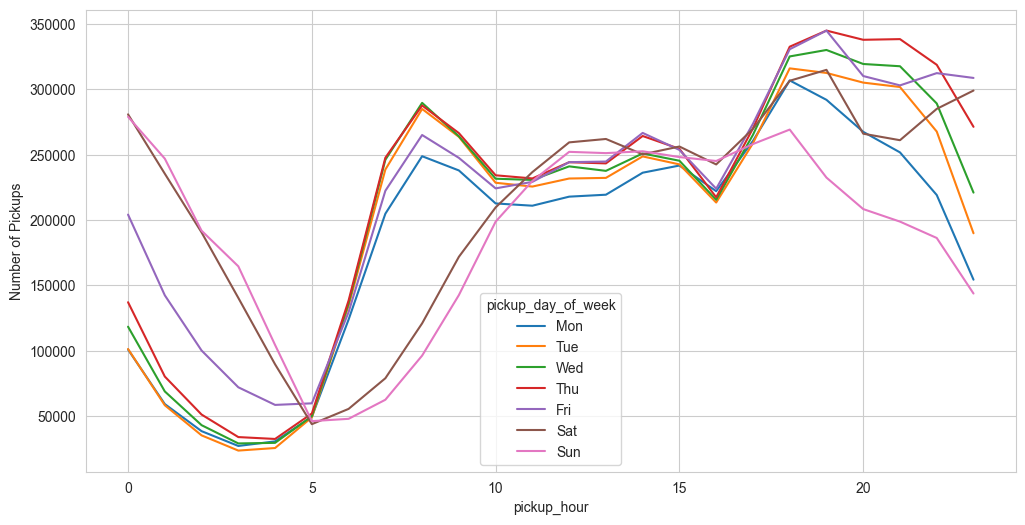

In [72]:
# plot the lineplot

fig = plt.figure(figsize=(12,6))

sns.lineplot(pickups_each_hour, x="pickup_hour", y="Number of Pickups", 
             hue="pickup_day_of_week",hue_order=day_names)

plt.show()